In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


[2465.6  637.7  300.5  127.2   82.4   69.1   49.3   37.7]
[123.80888498  51.5655893   39.55565699  21.03711007  13.87948126
  12.3          8.19817053   7.78524245]
[50.688 87.246 93.99  97.456 98.352 98.618 99.014 99.246]
[2.4761777  1.03131179 0.79111314 0.4207422  0.27758963 0.246
 0.16396341 0.15570485]
[4989.1 4987.7 4990.  4990.  4990.2 4990.5 4988.7 4989.3]
[2.54754784 2.19317122 2.56904652 2.82842712 2.44131112 2.37697286
 2.64764046 2.57099203]
[99.782 99.754 99.8   99.8   99.804 99.81  99.774 99.786]
[0.05095096 0.04386342 0.05138093 0.05656854 0.04882622 0.04753946
 0.05295281 0.05141984]


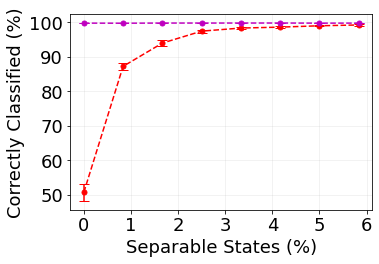

In [2]:


fidelity_list, fidelity_av, dms, pur_list, params_list, ent_list = pd.read_pickle(
    "../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_MEMS_k_params_[[0.0, 1.0]]_qs_2_separability_mix_TEST.pickle")

fidelity_list_ent, fidelity_av_ent, dms_ent, pur_list_ent, params_list_ent, ent_list_ent = pd.read_pickle(
    "../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_MEMS_k_params_[[0.0, 1.0]]_qs_2_separability_mix_TEST_entangled.pickle")
# fidelity_list, fidelity_av, dms, pur_list, params_list, ent_list = pd.read_pickle(
#     "../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_Werner_k_params_[[0.0, 1.0]]_qs_2_separability_mix_TEST_purity_gt_.25.pickle")
ent_array = np.array(ent_list).reshape(-1, 10)
ent_mean = ent_array.mean(axis=1)
ent_std = ent_array.std(axis=1)
print(ent_mean)
print(ent_std)
sep_array_percent = (5000-ent_array)*100/5000
sep_classification_acc = sep_array_percent.mean(axis=1)
sep_classification_std = sep_array_percent.std(axis=1)
print(sep_classification_acc)
print(sep_classification_std)


ent_array_ent = np.array(ent_list_ent).reshape(-1, 10)
ent_mean_ent = ent_array_ent.mean(axis=1)
ent_std_ent = ent_array_ent.std(axis=1)
print(ent_mean_ent)
print(ent_std_ent)
sep_array_percent_ent = (ent_array_ent)*100/5000
sep_classification_acc_ent = sep_array_percent_ent.mean(axis=1)
sep_classification_std_ent = sep_array_percent_ent.std(axis=1)
print(sep_classification_acc_ent)
print(sep_classification_std_ent)


sep_added = [0, 250, 500, 750, 1000, 1250, 1500, 1750]
sep_added = np.array(sep_added)*100/30000
colors = ['r', 'm', 'g', 'b']
i = 0
# plt.errorbar(sep_added, ent_mean, yerr=ent_std, fmt=f'--{colors[0]}o', ecolor=f'{colors[i]}',
#                  elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#                  xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=f'')
plt.errorbar(sep_added, sep_classification_acc, yerr=sep_classification_std, fmt=f'--{colors[0]}o', ecolor=f'{colors[0]}',
                 elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=f'')

plt.errorbar(sep_added, sep_classification_acc_ent, yerr=sep_classification_std_ent, fmt=f'--{colors[1]}o', ecolor=f'{colors[1]}',
                 elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=f'')

fs = 18
plt.grid(alpha=0.2)
plt.xlabel('Separable States (%)', fontsize=fs)
plt.ylabel('Correctly Classified (%)', fontsize=fs)
# plt.legend()
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.subplots_adjust(bottom=0.2, left=0.2)

# plt.savefig('classification_separable_MEMS.svg', dpi=600)
# plt.savefig('classification_separable_MEMS.png', dpi=600)
plt.show()
